In [31]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import scipy.io as sio
import sklearn
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [2]:
def LoadData( path ):
    
    _mat = sio.loadmat( path )
    keys = list( _mat.keys() )
    dataset = _mat['fea']
    n = dataset.shape[0]
    k = _mat['gnd']
    k = np.max( k )
    
    img_mat = []
    
    #get the img_set
    for i in range(n):
        img = dataset[i].reshape(32,32)
        img_mat.append(img)
    
    #RET:
    #initial total information , the keys in dict, the img_set of dataset
    return dataset, keys, img_mat, k

In [3]:
def RandCents( img_set, k ):
    init_cents_inds = []
    n = len(img_set)
    step = n / k
    for i in range(n):
        if i % step == 0:
            init_cents_inds.append(i)
    return init_cents_inds

In [4]:
path = 'data/COIL20.mat'
dataset, keys, img_set, k = LoadData( path )
init_cents_inds = RandCents( img_set, k )

[0.58890035 0.2971608  0.0455643  0.02978036 0.01356543]
[0.49844463 0.23049031 0.10996301 0.06484918 0.03697636]
9.23322295269449


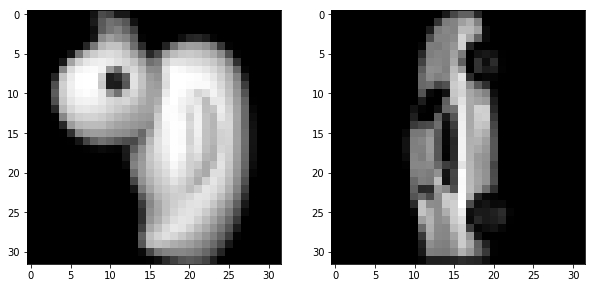

In [20]:
#for PCA, the result is not good
img0 = img_set[0]
plt.subplot(121)
plt.imshow(img0)
pca = PCA( n_components = 5 )
pca.fit(img0)
print( pca.explained_variance_ratio_ )
mat0 = pca.transform( img0 )
#print( mat0 )

img1 = img_set[144]
plt.subplot(122)
plt.imshow(img1)
pca = PCA( n_components = 5 )
pca.fit(img1)
print( pca.explained_variance_ratio_ )
mat1 = pca.transform( img1 )
#print( mat1 )

print( np.sqrt( np.sum( np.power(mat1-mat0, 2) ) ) )
plt.show()

In [25]:
def sift_trans( img, path, ip ):
    
    img = cv2.normalize( img, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U )
    cv2.imwrite( path.format(ip), img )
    img = cv2.imread( path.format(ip), 0 )
    sift = cv2.xfeatures2d.SIFT_create()
    kps, des = sift.detectAndCompute( img, None )
    return kps, des

In [55]:
def TransShape( _mat, n, m ):
    bg_zeros = np.zeros( (n,m) )
    for i in range(_mat.shape[0]):
        for j in range(_mat.shape[1]):
            bg_zeros[i,j] = _mat[i,j]
    return bg_zeros

In [58]:
#nda means ndarray(numpy)
def CalcDist( nda_a, nda_b ):
    n = max( nda_a.shape[0], nda_b.shape[0] )
    m = max( nda_a.shape[1], nda_b.shape[1] )
    temp_a = TransShape( nda_a, n, m )
    temp_b = TransShape( nda_b, n, m )
    dist = np.sqrt( np.sum( np.power(temp_a-temp_b, 2) ) )
    return dist

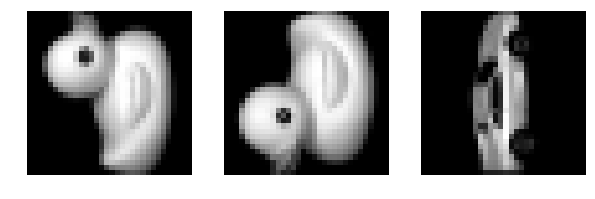

duck_des and duck_xf_des 1273.5764602095942
duck_desa and car_des 1562.0848248414682
duck_xf_des and car_des 1511.5204265903917


In [59]:
#the sift part
_path = 'data/test_cache/{}.png'
duck = img_set[0]
duck_xf = img_set[40]
car = img_set[144]
imgs = [ duck, duck_xf, car ]
for i in range(len(imgs)):
    plt.subplot( 1, len(imgs), i+1 )
    plt.imshow( imgs[i] )
    plt.axis('off')
plt.show()

duck_kps, duck_des = sift_trans( duck, _path, 0 )
duck_xf_kps, duck_xf_des = sift_trans( duck_xf, _path, 1 )
car_kps, car_des = sift_trans( car, _path, 2 )
print( 'duck_des and duck_xf_des', CalcDist( duck_des, duck_xf_des ) )
print( 'duck_desa and car_des', CalcDist( duck_des, car_des ) )
print( 'duck_xf_des and car_des', CalcDist( duck_xf_des, car_des ) )